In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv('products-data-minimised.csv')

In [3]:
df

,NameDescription,categories
0,tungsten solder pick handle solder pick pickin...,"Arts, Crafts & Sewing"
1,write right screen protector sony tc screen n...,Cell Phones & Accessories
2,casio men dbc databank digital watch disconti...,"Clothing, Shoes & Jewelry"
3,factoryreconditioned dewalt dwkr heavyduty am...,Tools & Home Improvement
4,energizer light twoway light feature bright ...,Health & Personal Care
...,...,...
44799,berkley trilene xl yard fishing line clear l...,Sports & Outdoors
44800,badger airbrush company basic spray gun set ea...,"Arts, Crafts & Sewing"
44801,fimo soft polymer clay ounces tropical green ...,"Arts, Crafts & Sewing"
44802,wilton icing color oz rose petal icing color ...,Grocery & Gourmet Food


In [4]:
df['categories'].unique().shape

(18,)

In [5]:
#M class has way less data than the orthers, thus the classes are unbalanced.
df.categories.value_counts()

Electronics                  4349
Beauty                       4327
Baby Products                4205
Grocery & Gourmet Food       2196
Toys & Games                 2192
Cell Phones & Accessories    2185
Tools & Home Improvement     2178
Appliances                   2177
Arts, Crafts & Sewing        2171
Patio, Lawn & Garden         2163
Office Products              2144
Health & Personal Care       2141
Sports & Outdoors            2120
Musical Instruments          2093
Clothing, Shoes & Jewelry    2087
Pet Supplies                 2073
Industrial & Scientific      2016
Automotive                   1987
Name: categories, dtype: int64

In [6]:
catList=df['categories'].unique().tolist()

In [7]:
catList

['Arts, Crafts & Sewing',
 'Cell Phones & Accessories',
 'Clothing, Shoes & Jewelry',
 'Tools & Home Improvement',
 'Health & Personal Care',
 'Baby Products',
 'Patio, Lawn & Garden',
 'Beauty',
 'Sports & Outdoors',
 'Electronics',
 'Automotive',
 'Toys & Games',
 'Office Products',
 'Appliances',
 'Musical Instruments',
 'Industrial & Scientific',
 'Grocery & Gourmet Food',
 'Pet Supplies']

<function ndarray.tolist>

In [8]:
#I do aspire here to have balanced classes
num_of_categories = 1987
shuffledList=[None]*len(catList)
    
shuffled = df.reindex(np.random.permutation(df.index))
for cat in catList:
    shuffledList[catList.index(cat)] = shuffled[shuffled['categories'] == cat][:num_of_categories]

#e = shuffled[shuffled['categories'] == 'e'][:num_of_categories]
#b = shuffled[shuffled['categories'] == 'b'][:num_of_categories]
#t = shuffled[shuffled['categories'] == 't'][:num_of_categories]
#m = shuffled[shuffled['categories'] == 'm'][:num_of_categories]
concated = pd.concat(shuffledList, ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

In [9]:
concated

,NameDescription,categories,LABEL
32441,sprout house certified organic nongmo sproutin...,Grocery & Gourmet Food,0
29469,american dj snapshot ii watt variable speed s...,Musical Instruments,0
16971,winning move ttc predator deadliest efficient ...,Sports & Outdoors,0
35381,zoo med screen cover door gallon tank zoo me...,Pet Supplies,0
2933,lg vortex phone standard red led wall ac home ...,Cell Phones & Accessories,0
...,...,...,...
27483,whirlpool hose washer whirlpool hose washer ...,Appliances,0
2970,motorola slvr l unlocked phone camera mpvideo ...,Cell Phones & Accessories,0
23644,falling goblin edition celebrate th anniversar...,Toys & Games,0
1419,oz heavy body acrylic color paint color magen...,"Arts, Crafts & Sewing",0


In [10]:
pd.DataFrame(concated).categories.value_counts()

Grocery & Gourmet Food       1987
Musical Instruments          1987
Office Products              1987
Toys & Games                 1987
Automotive                   1987
Tools & Home Improvement     1987
Arts, Crafts & Sewing        1987
Appliances                   1987
Health & Personal Care       1987
Baby Products                1987
Electronics                  1987
Patio, Lawn & Garden         1987
Clothing, Shoes & Jewelry    1987
Industrial & Scientific      1987
Cell Phones & Accessories    1987
Pet Supplies                 1987
Sports & Outdoors            1987
Beauty                       1987
Name: categories, dtype: int64

In [11]:
#One-hot encode the lab

for cat in catList:
    concated.loc[concated['categories'] == cat, 'LABEL'] = catList.index(cat)

print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=18)
print(labels[:10])
if 'categories' in concated.keys():
    concated.drop(['categories'], axis=1)

32441    16
29469    14
16971     8
35381    17
2933      1
29907    15
5629      2
12872     6
19394     9
5701      2
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['NameDescription'].values)
sequences = tokenizer.texts_to_sequences(concated['NameDescription'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 99207 unique tokens.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

In [16]:
epochs = 25
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0.]], dtype=float32)

In [85]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(18, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])


((26824, 130), (26824, 18), (8942, 130), (8942, 18))
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 130, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 18)                1170      
                                                                 
Total params: 1,074,578
Trainable params: 1,074,578
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25
84/84 [==============================] - 

In [79]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

280/280 [==============================] - 4s 12ms/step - loss: 0.7929 - acc: 0.8018
Test set
  Loss: 0.793
  Accuracy: 0.802


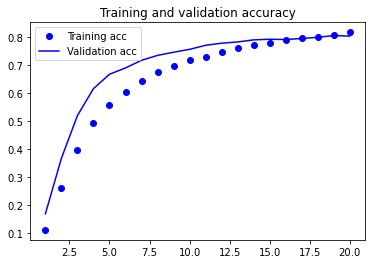

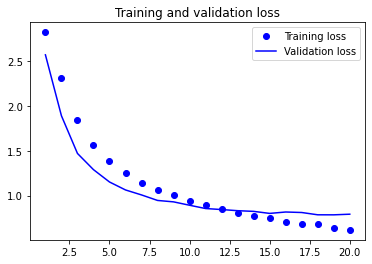

In [80]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [82]:
txt = ["Our Class is a Family"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
#labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, catList[np.argmax(pred)])

1/1 [==============================] - 0s 28ms/step
[[0.05847999 0.04876118 0.03196033 0.04748031 0.05265407 0.04897525
  0.04689274 0.02672727 0.07578155 0.08305548 0.03652868 0.08696165
  0.06606714 0.02550324 0.04012725 0.09008887 0.09049667 0.04345827]] Grocery & Gourmet Food


In [83]:
catList

['Arts, Crafts & Sewing',
 'Cell Phones & Accessories',
 'Clothing, Shoes & Jewelry',
 'Tools & Home Improvement',
 'Health & Personal Care',
 'Baby Products',
 'Patio, Lawn & Garden',
 'Beauty',
 'Sports & Outdoors',
 'Electronics',
 'Automotive',
 'Toys & Games',
 'Office Products',
 'Appliances',
 'Musical Instruments',
 'Industrial & Scientific',
 'Grocery & Gourmet Food',
 'Pet Supplies']